Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 7.1

## Part A. Median Heap (watch this [video explanation](https://www.youtube.com/watch?v=756_8C9YBZQ&list=PLF_a-qBXTGFektoI6JUOTRL36JlvD04BR&index=5&t=0s) or read this [description](https://stackoverflow.com/a/15319593/7946759))

Throughout this pre-class work, please use the following definition of median: the median of a list of numbers is the one in the middle of the list when the list is ordered. When such the middle element can’t be determined (i.e., in a list of even length), the average of the two middle elements is the median. For example, 5 is the median of [-1,2,4,5,8,10,12], and (5+7)/2=6 is the median of [1,2,3,5,7,8,10,11].

Using the idea from Lesson 3.2, we can use a pair of heaps to create a data structure which allows fast access to the median. Use the heapq module in python to create both a max-heap and a min-heap. Note that by default, the heapq module in python only creates min-heaps, but if we multiply elements by -1 when we store them, then we can also create max-heaps.


## Question 1.
Write a function `add_to_median_heap(minh, maxh, elem)`. It must accept a min heap, a max heap, and an element to add.


In [9]:
import heapq

def add_to_median_heap(minh, maxh, elem):
    #if the heaps are empty, adding the value to the max heap
    if len(minh) == 0 and len(maxh) == 0:
        heapq.heappush(maxh, elem)
    else:
        #creating a marker that track the median
        marker = median(minh, maxh)
        #here, depending on the median we pick where to add the element
        if elem < marker:
            heapq.heappush(maxh, elem)
        if elem > marker:
            heapq.heappush(minh, elem)
        
    return minh, maxh

## Question 2
Write a function `median(minh, maxh)`. It must return the median element.


In [10]:
def median(minh, maxh):
    #these two if statements are important as they control whether the heaps have the same size or differ by 1 number
    #if that's not the case, the elements are pushed from one heap to another
    if len(minh) - len(maxh) > 1:
        swap = heapq.heappop(minh)
        heapq.heappush(maxh, swap)
        #this makes the values negative to be able to create a max heap using a heapq funtion 
        #which works only for min heaps
        maxh_sub = [-x for x in maxh]
        heapq.heapify(maxh_sub)
        maxh = [-x for x in maxh_sub]
    if len(maxh) - len(minh) > 1:
        swap = heappop(maxheap)
        heapq.heappush(minh, swap)
        heapq.heapify(minh)
    #these if statements allow to return the median of the max and min heaps depending on the sizes of the heaps
    if len(minh) == len(maxh):
        median1 = (minh[0]+maxh[0])/2
        return median1
    if len(minh) - len(maxh) == 1:
        median1 = minh[0]
        return median1
    if len(maxh) - len(minh) == 1:
        median1 = maxh[0]
        return median1
    else:
        print("size difference is bigger than 1")

In [11]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3.

Uncomment and run the testing code given below to test your functions. It should print out numbers ranging from 1 to 50, in that order.

In [12]:
minh = []
maxh = []
for a in range(1,100,2):
    add_to_median_heap(minh, maxh, a)
    print(int(median(minh, maxh)))
print(minh)
print(maxh)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
[51, 55, 53, 59, 63, 75, 57, 61, 69, 71, 67, 91, 87, 95, 99, 83, 65, 79, 73, 77, 81, 85, 89, 93, 97]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


## Question 4.
What’s the worst case complexity to build a median heap using `add_to_median_heap`?

Given that my add_to_median_heap function calls the median function, and the rest are just constants, its worst case would be O(nlogn) as discussed in the next question.

## Question 5.
What’s the worst case complexity of `median`?

The worst time complexity would happen if every time we call the median function, we need to swap the numbers and heapify one of the heaps every time. The cost of the heapfy function is logn and assuming that we need to call on it every time we add values to the heaps, the worst time complexity would be O(nlogn). 

## Question 6.

How does this way of finding the median compare with the vanilla way of sorting the list and pick the middle element? Use arguments based on efficiency or clearity of the respective algorithms.

I guess that given that our worst time complexity is nlogn, such result is quite good compared to most of the sorting algorithms we have discussed previously - many of them had the worst running time of O(n^2), and therefore median heap is more efficient because it's growth is smaller.

## [Optional] Question 7.

Is it possible to extend this idea to any percentile? If it is, then write code to do so. If it’s not possible, prove why it is not possible.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. Quickselect

Quicksort can be modified to find the $k$-th smallest element in an unordered list. This is known as quickselect. It does this by choosing a partition (as in quicksort). Once the list has been partitioned then we know how many elements lie to the left and to the right of the partition. This allows us to recursively call quickselect on the correct sublist.

## Question 1.

Write a function `qselect(lst, k)`, which takes both a list and an index $k$. The function must then return the $k$-th smallest item in the list.


In [13]:
def partition(A,p,r):
    #using the last number to be a divider
    x = A[r]
    #creating a variable that we will update every time we find a value to the left of the divider that is smaller
    i = p - 1
    #iterating through the list
    for j in range(p, r+1):
        #checking if the number is smaller than the divider
        if A[j] < x:
            #if yes, then updating i
            i = i+1
            #swapping the value under index j to the value under index i
            #this will assure that the values smaller to the divider always stay to the left from A[i+1]
            A[j],A[i] = A[i],A[j]
    #placing the divider in the correct position
    A[i+1],A[r] = A[r], A[i+1]
    #returning index of the divider
    return i+1

In [14]:
def qselect(lst,k):
    q = partition(lst, 0, len(lst)-1)
    #while the k is not found we perform the partitions
    while k != q:
        #here we identify which part of the divided list we proceed with
        if k<q:
            q = partition(lst, 0, q-1)
        elif k>q:
            q = partition(lst, q, len(lst)-1)
    return lst[q]
    
qselect([3,7,1,9,0,-3,5], 0)
            

-3

In [21]:
import random
random.seed(123) # introducing a seed for reproducibility purposes
lst1 = list(range(100))
random.shuffle(lst1)
lst2 = []
for a in range(100):
    lst2.append(qselect(lst1, a))
assert(lst2 == list(range(100)))

## Question 2.
Uncomment and run the testing code given below to test your function. It should print out integers from 0 to 99.


In [16]:
import random
random.seed(123) # introducing a seed for reproducibility purposes
lst = list(range(100))
random.shuffle(lst)
for a in range(100):
    print(qselect(lst, a))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## Question 3.

Write down the recurrence relation for your code.

The average case will happen if the divisions are highly balanced. In this case the list will be divided into two equal parts, however in this case the difference is that we will proceed only with one of the halves. This will continue until we reach the desired value. Thus, the recurrence equation is T(n/2) + Θ(n). Further I solve it using a recurrence tree:

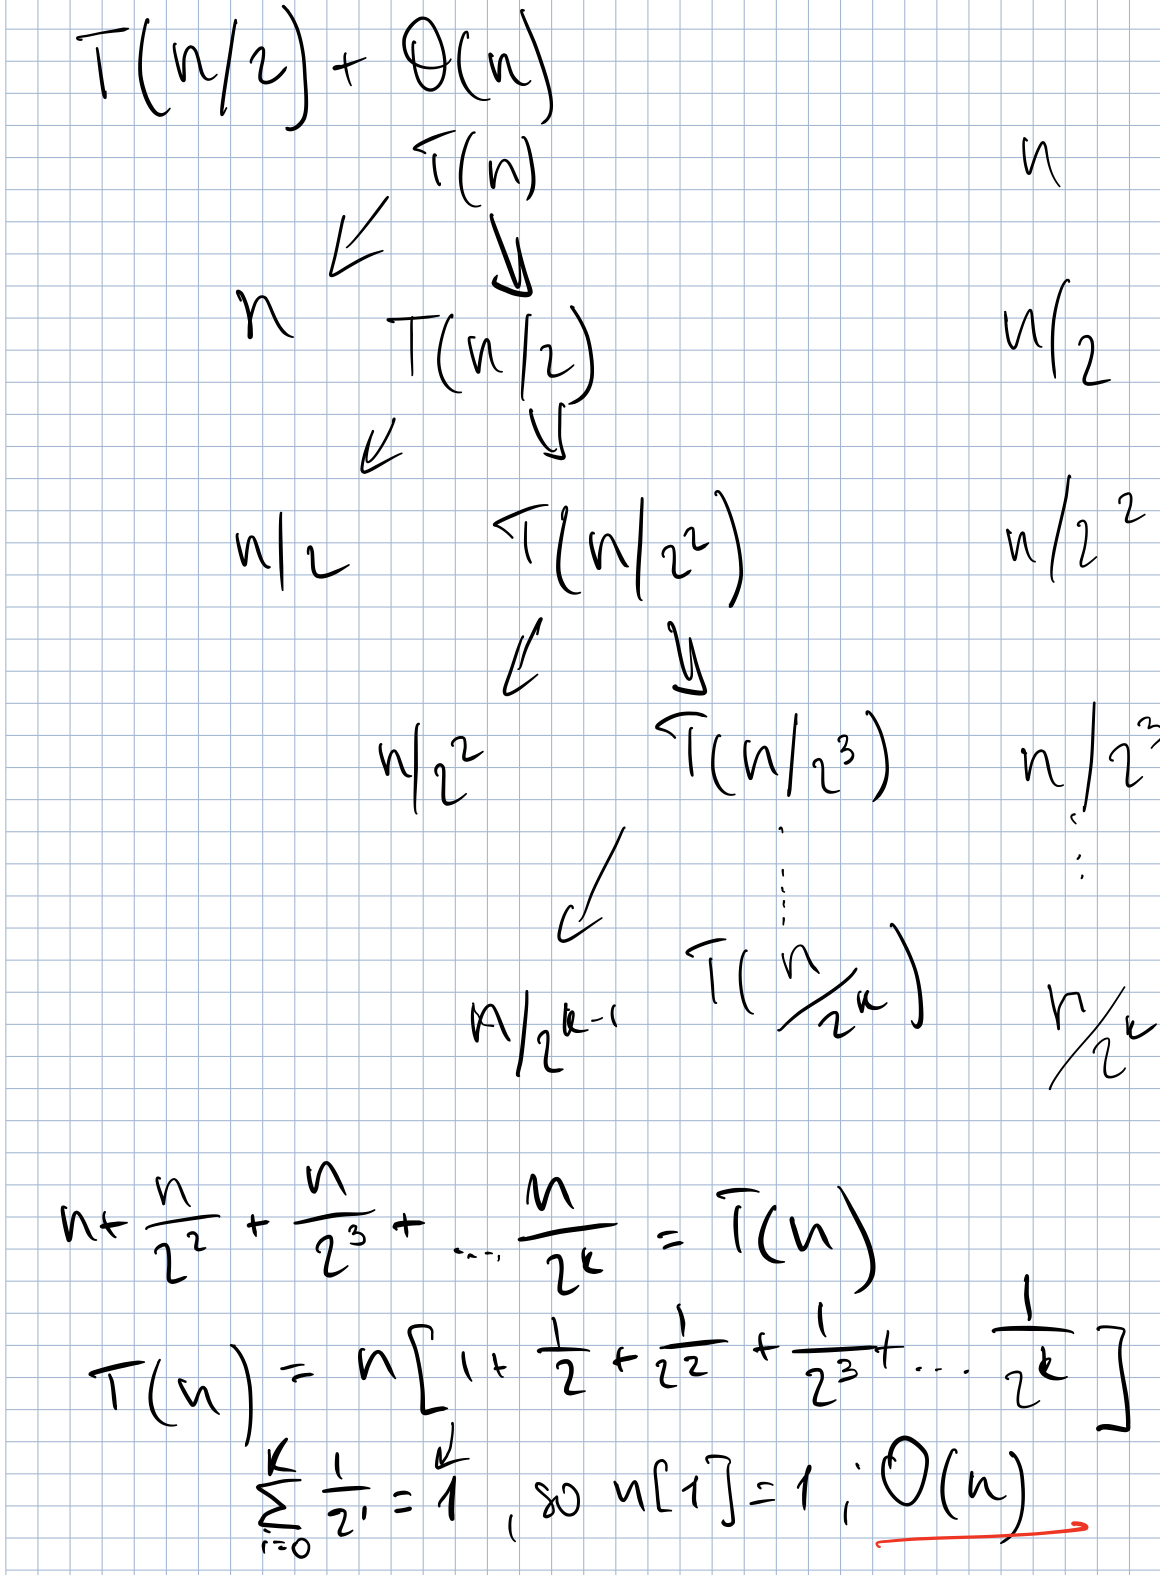

In [19]:
from IPython.display import Image
Image(filename='IMG_411DE3AE38AF-1.jpeg')

As we can see, the upper bound would be O(n). However, I think that a tighter bound would be Θ(n).

## Question 4.

Solve the recurrence relation for quickselect in the best case.


The best case will happen if we divide the list in a correct place at the first iteration. The recurrence relation will be T(1) + Θ(n) and it's solution will be O(n), because even if we divide the list in a correct place, we will still have to perform n comparisons. 

## Question 5.

Solve the recurrence relation for quickselect in the worst case.

The worst case would happen if we have highly unbalanced divisions and we move one number per iteration and the k is the biggest/smallest value of the list (then for the worst case we would have to pick the first or last values as pivots respectively). In this case, the recurrense relation would be T(n-1) + Θ(n). Further we solve this recurrence relation using a recurrence tree:

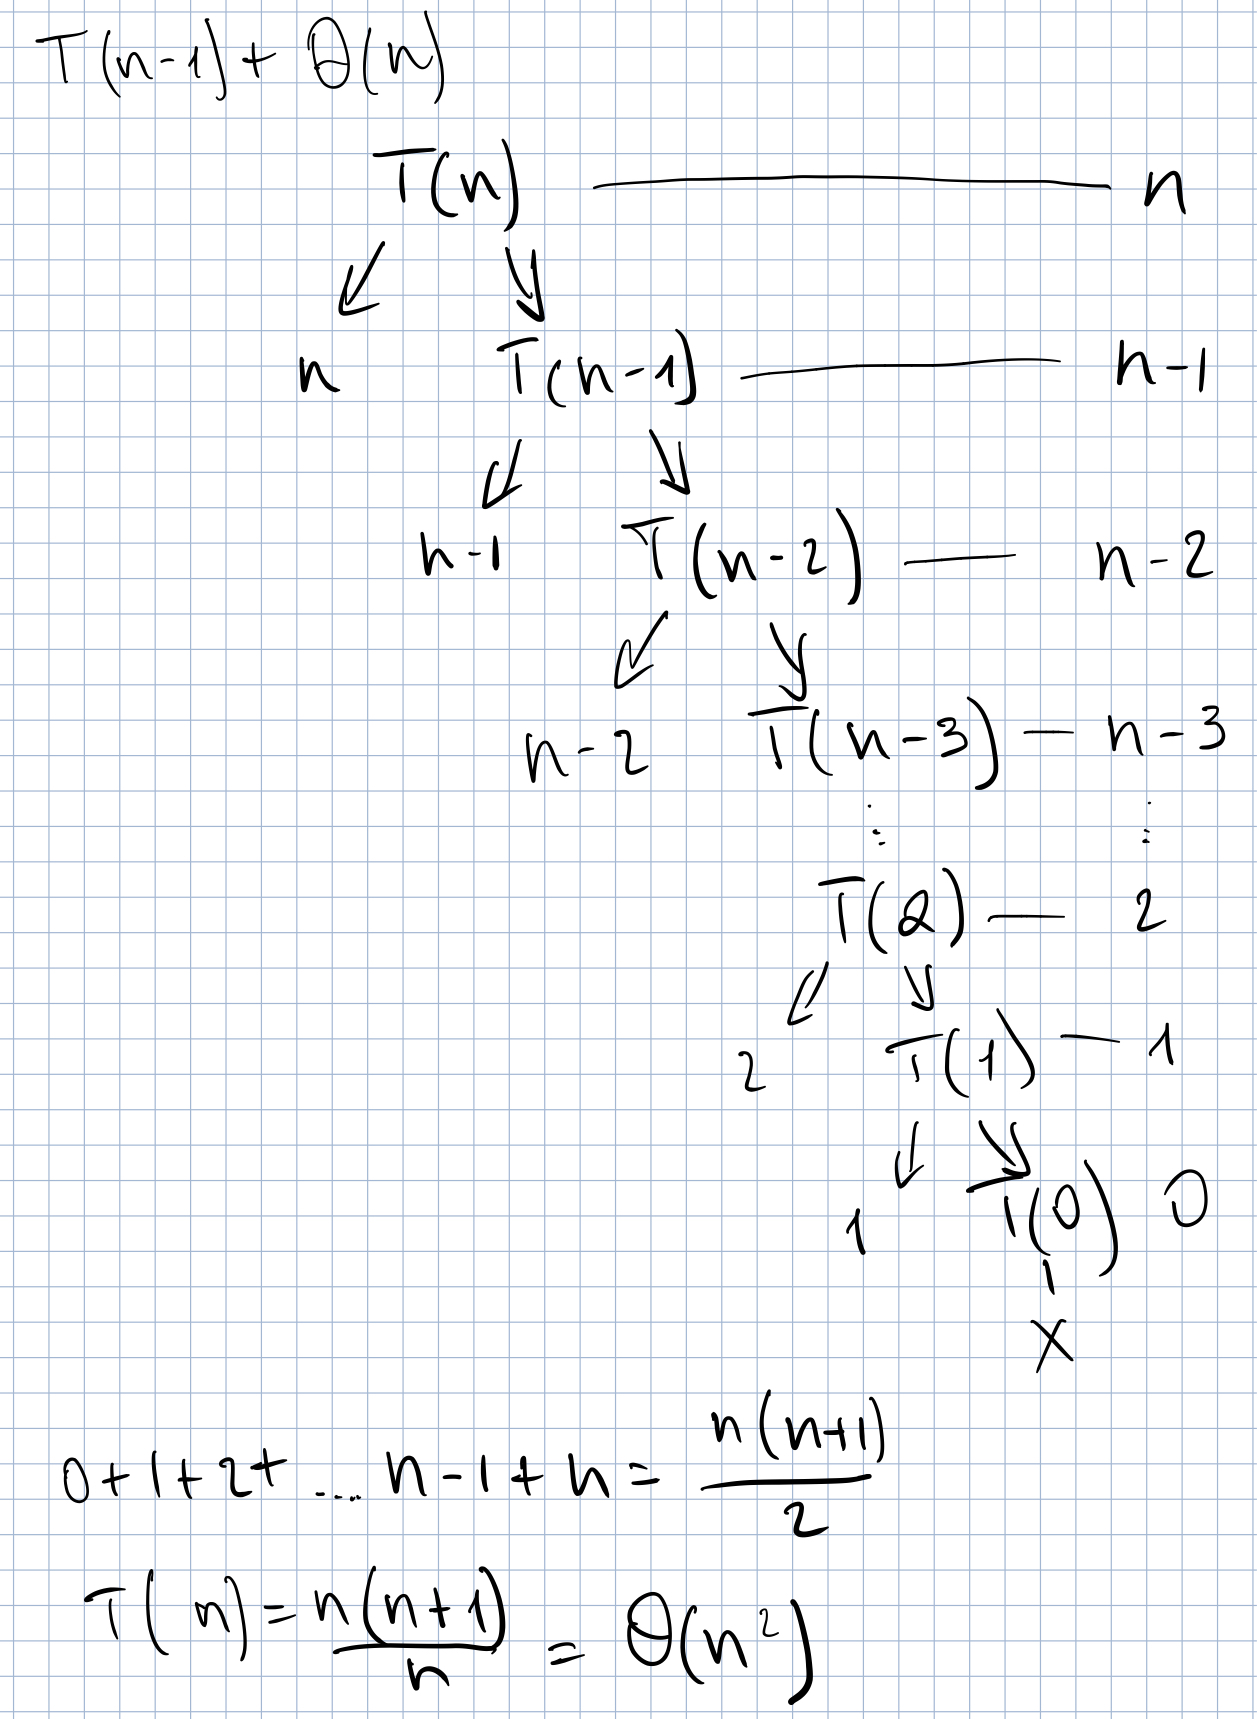

In [17]:
from IPython.display import Image
Image(filename='IMG_B80856935477-1.jpeg')

We see that at each level the function takes n time and calls on itself untill it reaches the last number. We add all of the levels together and obtain n(n+1)/2 and given that this yield n^2 which has the highest power, time complexity will be Θ(n^2)